# Construction des variables clients (features engineering)

Dans ce notebook, nous préparons des variables statistiques qui décrivent le comportement d'achat de chaque client.

## Objectif :
Créer une base agrégée par client contenant :
- Nombre total d’achats
- Fréquence d’achat
- Panier moyen
- Produits uniques achetés
- Nombre de jours actifs

Cette base servira à segmenter les clients et alimenter les modèles de recommandation.

In [1]:
# Ouverture du fichier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "../data/Online_Retail_cleaned.csv"
DATA = pd.read_csv(FILE)
print(DATA.shape)
DATA.head()

(397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
agg_data = DATA.groupby("CustomerID").agg(
    Total_Purchases=('InvoiceNo', 'nunique'),
    Purchase_Frequency=('InvoiceNo', 'count'),
    Unique_Products=('StockCode', 'nunique'),
).reset_index()
agg_data['CustomerID'] = agg_data['CustomerID'].astype(int)
agg_data.fillna(0, inplace=True)
agg_data.head()

,CustomerID,Total_Purchases,Purchase_Frequency,Unique_Products
0,12346,1,1,1
1,12347,7,182,103
2,12348,4,31,22
3,12349,1,73,73
4,12350,1,17,17


In [17]:
total_price_by_customer = DATA.groupby("CustomerID")[["Quantity", "UnitPrice"]].sum().reset_index()
agg_data['Average_Basket'] = total_price_by_customer['Quantity'] * total_price_by_customer['UnitPrice'] / agg_data['Purchase_Frequency']
agg_data['Active_Days'] = DATA.groupby("CustomerID")['InvoiceDate'].nunique().reset_index(drop=True)
agg_data.fillna(0, inplace=True)
agg_data.head(10)

,CustomerID,Total_Purchases,Purchase_Frequency,Unique_Products,Average_Basket,Active_Days
0,12346,1,1,1,77183.600000,1
1,12347,7,182,103,6498.979011,7
2,12348,4,31,22,13495.487419,4
3,12349,1,73,73,5230.384932,1
4,12350,1,17,17,756.711765,1
5,12352,8,85,59,8538.858353,8
6,12353,1,4,4,121.500000,1
7,12354,1,58,58,2387.010345,1
8,12355,1,13,13,1008.923077,1
9,12356,3,59,53,5093.087627,3


In [21]:
agg_data.to_csv("../data/agg_data.csv", index=False)

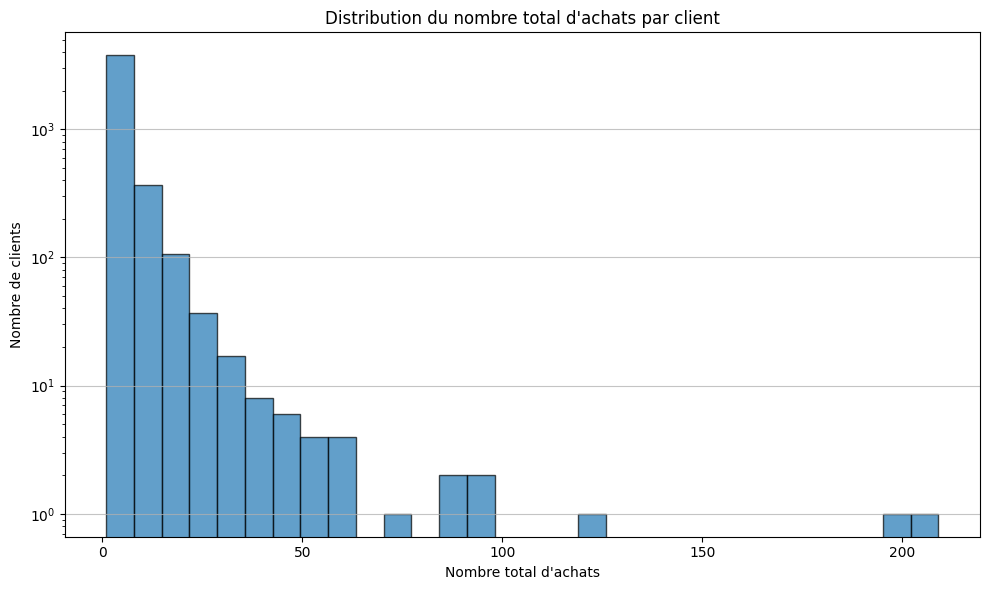

In [28]:
# plots
plt.figure(figsize=(10, 6))
agg_data['Total_Purchases'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, logy=True)
plt.title("Distribution du nombre total d'achats par client")
plt.xlabel("Nombre total d'achats")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()